# Final Models Running & Evaluation

In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [107]:
df = pd.read_csv('/Users/yaoruofan/Downloads/clean_dataset2.csv')
df.head()

,price,year,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,state,MSRP,car_age,is_vintage,is_color_neutral
0,22590,2010,2,4,2,71229,0,2,0,8,1,46110,11,0,0
1,4500,1992,0,3,2,192000,0,0,0,0,1,25695,29,0,0
2,14000,2012,0,3,2,95000,0,0,1,5,1,37775,9,0,1
3,32990,2019,2,4,4,6897,0,2,0,8,1,38400,2,0,1
4,2100,2006,1,1,2,97000,0,0,0,4,1,21495,15,0,0


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120987 entries, 0 to 120986
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype
---  ------            --------------   -----
 0   price             120987 non-null  int64
 1   year              120987 non-null  int64
 2   condition         120987 non-null  int64
 3   cylinders         120987 non-null  int64
 4   fuel              120987 non-null  int64
 5   odometer          120987 non-null  int64
 6   title_status      120987 non-null  int64
 7   transmission      120987 non-null  int64
 8   drive             120987 non-null  int64
 9   type              120987 non-null  int64
 10  state             120987 non-null  int64
 11  MSRP              120987 non-null  int64
 12  car_age           120987 non-null  int64
 13  is_vintage        120987 non-null  int64
 14  is_color_neutral  120987 non-null  int64
dtypes: int64(15)
memory usage: 13.8 MB


In [109]:
X = df.drop('price',axis = 1)
y = df['price']

### Random Forest

In [110]:
# Basic imports
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as MSE
# Set seed for reproducibility
SEED = 85
# Split dataset into 70% train and 30% test
X_train, X_test, y_train, y_test = \
train_test_split(X, y,
test_size=0.3,
random_state=SEED)

In [111]:
rf_reg = RandomForestRegressor(min_samples_leaf=25,n_estimators=100)
rf_reg.fit(X_train, y_train)

# Get predicted values on x_test
y_pred = rf_reg.predict(X_test)

#from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of rf: {:.3f}'.format(rmse_test))


Test set RMSE of rf: 3135.390


In [112]:
rf_reg.score(X_train,y_train),rf_reg.score(X_test,y_test)

(0.9017594492747903, 0.8901043468186222)

In [113]:
y_pred_dftrain = rf_reg.predict(X_train)
mse_test = MSE(y_train, y_pred_dftrain)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Train set RMSE of rf train: {:.3f}'.format(rmse_test))

Train set RMSE of rf train: 2971.656


In [114]:
# Compute the array containing the 10-folds CV MSEs
from sklearn.model_selection import cross_val_score
MSE_CV_scores = - cross_val_score(rf_reg, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 3215.39


In [115]:
# Mean Absolute Proportion Error
residual = y_test - y_pred
ape = np.abs(residual) / y_test
mape = np.mean(ape)
print(round(mape,7))

0.2504624


In [ ]:
# Bagging Regression
# Meta-algorithm combining predictions from multiple-decision
# trees through a majority voting mechanism

bag_reg = BaggingRegressor()
bag_reg.fit(X_train, y_train)

# Get predicted values on x_test
y_pred = bag_reg.predict(X_test)

print("\t------- Bagging Regression -------")
bag_acc = reg_metrics(bag_reg, y_pred, X_train, X_test, y_train, y_test)

acc_df.loc['Bagging'] = bag_acc

### GradientBoosting

In [123]:
# Import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor

# Instantiate gb
gb = GradientBoostingRegressor(max_depth=4,
                               n_estimators=200,
                               random_state=SEED)

# Fit gb to the training set
gb.fit(X_train, y_train)

# Predict test set labels
y_pred_Gboost = gb.predict(X_test)

# Import mean_squared_error as MSE
#from sklearn.metrics import mean_squared_error as MSE

# Compute MSE
mse_test = MSE(y_test, y_pred_Gboost)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of gb: {:.3f}'.format(rmse_test))


Test set RMSE of gb: 3143.895


In [124]:
y_pred_Gboost_train = gb.predict(X_train)
# Compute MSE
mse_test = MSE(y_train, y_pred_Gboost_train)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Train set RMSE of gb: {:.3f}'.format(rmse_test))

Train set RMSE of gb: 3111.858


In [125]:
# Compute the array containing the 10-folds CV MSEs
from sklearn.model_selection import cross_val_score
MSE_CV_scores = - cross_val_score(gb, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 3179.89


In [126]:
gb.score(X_train,y_train),gb.score(X_test,y_test)

(0.8922708285486293, 0.8895073646294681)

In [127]:
# Mean Absolute Proportion Error
residual = y_test - y_pred_Gboost
ape = np.abs(residual) / y_test
mape = np.mean(ape)
print(round(mape,7))

0.2526609


## Overfitting!!!

In [15]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
params = { 'max_depth': [3,4,5,7],
           'learning_rate': [0.05, 0.1, 0.3],
           'n_estimators': [50,100,200],
           'colsample_bytree': [0.5, 0.7],
         'subsample':[0.8], 'gamma':[0,0.25]}
xgbr = xgb.XGBRegressor(seed = 85)
clf = GridSearchCV(estimator=xgbr, 
                   
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'colsample_bytree': 0.7, 'gamma': 0, 'learning_rate': 0.3, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
Lowest RMSE:  2547.382378977299


In [16]:
params = { 'max_depth': [7,8],
           'learning_rate': [0.3,0.5],
           'n_estimators': [200,500],
           'colsample_bytree': [0.7,0.8],
         'subsample':[0.8,0.9]}
xgbr = xgb.XGBRegressor(seed = 85)
clf = GridSearchCV(estimator=xgbr, 
                   
                   param_grid=params,
                   scoring='neg_mean_squared_error', 
                   verbose=1)
clf.fit(X_train, y_train)
print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

Fitting 5 folds for each of 32 candidates, totalling 160 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.3, 'max_depth': 8, 'n_estimators': 500, 'subsample': 0.9}
Lowest RMSE:  2397.5648226850567


In [28]:
xgbr = xgb.XGBRegressor(max_depth = 8,
                        n_estimators = 500,
                        colsample_bytree = 0.7,
                        subsample = 0.9)
xgbr.fit(X_train, y_train)
pp = xgbr.predict(X_test)

xgbr.score(X_train,y_train),xgbr.score(X_test,y_test)

(0.9863474084079347, 0.9396890407481001)

In [30]:

# Compute MSE
mse_test = MSE(y_test, pp)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of xgb: {:.3f}'.format(rmse_test))


Test set RMSE of xgb: 2323.098


In [36]:
pp_train = xgbr.predict(X_train)
mse_test = MSE(y_train, pp_train)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of xgb train: {:.3f}'.format(rmse_test))

Test set RMSE of xgb train: 1110.249


**Train RMSE is much smaller than Test RESE**

In [34]:
# Mean Absolute Proportion Error
residual = y_test - pp
ape = np.abs(residual) / y_test
mape = np.mean(ape)
print(round(mape,7))

0.1721138


## Try new XGBoost!!! No overfitting

In [116]:
import xgboost as xgb
xgbr = xgb.XGBRegressor(max_depth = 4,
                        n_estimators = 500,
                        colsample_bytree = 0.7,
                        subsample = 0.9)
xgbr.fit(X_train, y_train)
pp = xgbr.predict(X_test)

xgbr.score(X_train,y_train),xgbr.score(X_test,y_test)

(0.9358781059910977, 0.9213748348105647)

In [117]:
pp_train = xgbr.predict(X_train)
mse_test = MSE(y_train, pp_train)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Train set RMSE of xgb train: {:.3f}'.format(rmse_test))

Train set RMSE of xgb train: 2400.801


In [118]:
# Compute the array containing the 10-folds CV MSEs
from sklearn.model_selection import cross_val_score
MSE_CV_scores = - cross_val_score(xgbr, X_train, y_train, cv=10, 
                                  scoring='neg_mean_squared_error', 
                                  n_jobs=-1) 

# Compute the 10-folds CV RMSE
RMSE_CV = (MSE_CV_scores.mean())**(1/2)

# Print RMSE_CV
print('CV RMSE: {:.2f}'.format(RMSE_CV))

CV RMSE: 2674.25


In [120]:
# Compute MSE
mse_test = MSE(y_test, pp)

# Compute RMSE
rmse_test = mse_test**(1/2)

# Print RMSE
print('Test set RMSE of xgb: {:.3f}'.format(rmse_test))


Test set RMSE of xgb: 2652.052


In [121]:
# Mean Absolute Proportion Error
residual = y_test - pp
ape = np.abs(residual) / y_test
mape = np.mean(ape)
print(round(mape,7))

0.2096238


### Feature Importance

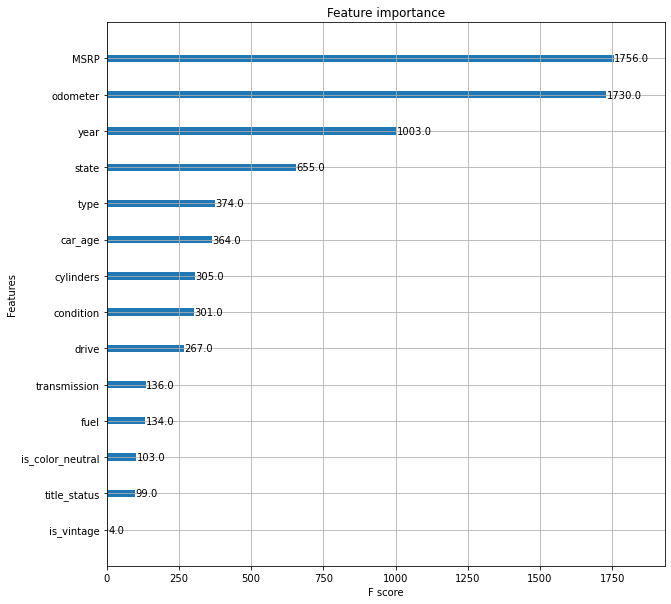

In [122]:
from xgboost import plot_importance
plt.rcParams["figure.figsize"] = (10,10)
plt.show(plot_importance(xgbr))